In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Prepare the data as shown in the preceding XOR table:

In [30]:
X = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
X

array([[0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

Define the number of nodes in each layer:

In [31]:
y = np.array([ [1], [1], [0], [0]])
y

array([[1],
       [1],
       [0],
       [0]])

Initialize the weights and bias randomly. First, we initialize the input to hidden layer weights:

In [32]:
num_input = 2
num_hidden = 5
num_output = 1

In the real world, we don’t know which input is more important than the other so that we can weight them and compute the output. Therefore, we randomly initialize the weights and bias value. The weight and the bias value between the input to the hidden layer are represented by Wxh and bh, respectively.

Initialize the weights and bias randomly. First, we initialize the input to hidden
layer weights:

In [33]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

Now, we initialize the hidden to output layer weights:

In [34]:
Why = np.random.randn (num_hidden,num_output)
Why

array([[ 0.54631956],
       [ 1.51208427],
       [ 1.20899231],
       [ 1.01758922],
       [-0.09863211]])

In [35]:
by = np.zeros((1,num_output))
by

array([[0.]])

Define the sigmoid activation function:

In [36]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))


It is differentiable, meaning that we can find the slope of the curve at any two points. It is monotonic, which implies it is either entirely non-increasing or non-decreasing. The sigmoid function is also known as a logistic function. As we know that probability lies between 0 and 1, and since the sigmoid function squashes the value between 0 and 1, it is used for predicting the probability of output.

Define the derivative of the sigmoid function:
It scales the value between 0 and 1.


In [37]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

Other Activation Functions

- The tanh function: A hyperbolic tangent (tanh) function outputs the value between -1 to +1
It also resembles the S-shaped curve. Unlike the sigmoid function, which is centered on 0.5, the tanh function is 0-centered

- The Rectified Linear Unit function: The Rectified Linear Unit (ReLU) function is another one of the most commonly used activation functions. It outputs a value from zero to infinity. That is, f(x) returns zero when the value of x is less than zero and f(x) returns x when the value of x is greater than or equal to zero.

- The softmax function: The softmax function is basically the generalization of the sigmoid function. It is usually applied to the final layer of the network and while performing multi-class classification tasks. It gives the probabilities of each class for being output and thus, the sum of softmax values will always equal 1.


The number of layers in a network is equal to the number of hidden layers plus the number of output layers. We don’t take the input layer into account when calculating the number of layers in a network.

 The dimensions of the weight matrix must be the number of neurons in the current layer x the number of neurons in the next layer.

the dimension of the weight matrix, Wxh, should be the number of neurons in the input layer x the number of neurons in the hidden layer

The preceding equation represents, Z1 = input × weights + bias.

In the hidden layer, we apply an activation function to z1. Let’s use the sigmoid 𝜎𝜎 activation function.

After applying the activation function, we again multiply result a1 by a new weight matrix and add a new bias value that is flowing between the hidden layer and the output layer. We can denote this weight matrix and bias as Why and by, respectively.

So,
we multiply a1 by the weight matrix, Why, and add bias, by, and pass the result z2 to the next layer, which is the output layer:

This whole process from the input layer to the output layer is known as forward propagation. Thus, in order to predict the output value, inputs are propagated from the input layer to the output layer. During this propagation, they are multiplied by their respective weights on each layer and an activation function is applied on top of them.

Define the forward propagation:


In [38]:
def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    return z1,a1,z2,y_hat


Remember that we just initialized weight matrices randomly. Since the weights are random, they are not going to be perfect. Now, we will update these weight matrices (Wxh and Why) in such a way that our neural network gives a correct output. How do we update these weight matrices? Here comes a new technique called gradient descent.


We will now backpropagate the network from the output layer to the input layer and calculate the gradient of the cost function with respect to all the weights between the output and the input layer so that we can minimize the error. After calculating gradients, we update our old weights using the weight update rule.

This implies weights = weights -α x gradients.


Define the backward propagation:

In [39]:
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    return dJ_dWxh, dJ_dWhy

But how do we know whether the output generated by the neural network is correct? We define a new function called the cost function (J), also known as the loss function (L), which tells us how well our neural network is performing. There are many different cost functions. We will use the mean squared error as a cost function, which can be defined as the mean of the squared difference between the actual output and the predicted output

Define the cost function:

In [40]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

Set the learning rate and the number of training iterations:

In [41]:
alpha = 0.01
num_iterations = 5000

Now, let’s start training the network with the following code:

In [42]:
cost =[]
for i in range(num_iterations):
    z1,a1,z2,y_hat = forward_prop(X,Wxh,Why)
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
    #update weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy
    #compute cost
    c = cost_function(y, y_hat)
    cost.append(c)

Plot the cost function:

Text(0, 0.5, 'Cost')

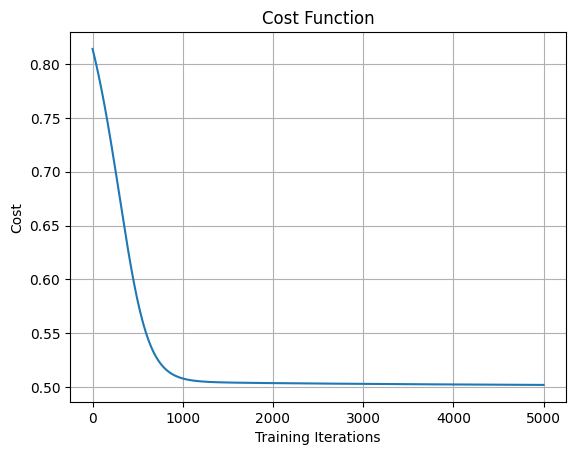

In [43]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

- Forward pass: Forward pass implies forward propagating from the input layer to the output layer.
- Backward pass: Backward pass implies backpropagating from the output layer to the input layer.
- Epoch: The epoch specifies the number of times the neural network sees our whole training data. So, we can say one epoch is equal to one forward pass and one backward pass for all training samples.
- Batch size: The batch size specifies the number of training samples we use in one forward pass and one backward pass.
- Number of iterations: The number of iterations implies the number of passes where one pass = one forward pass + one backward pass.
